### RMSE for each proability level for pie charts ###
- are there differences in participant's estimation of pie probabilities overall and between the pie types????

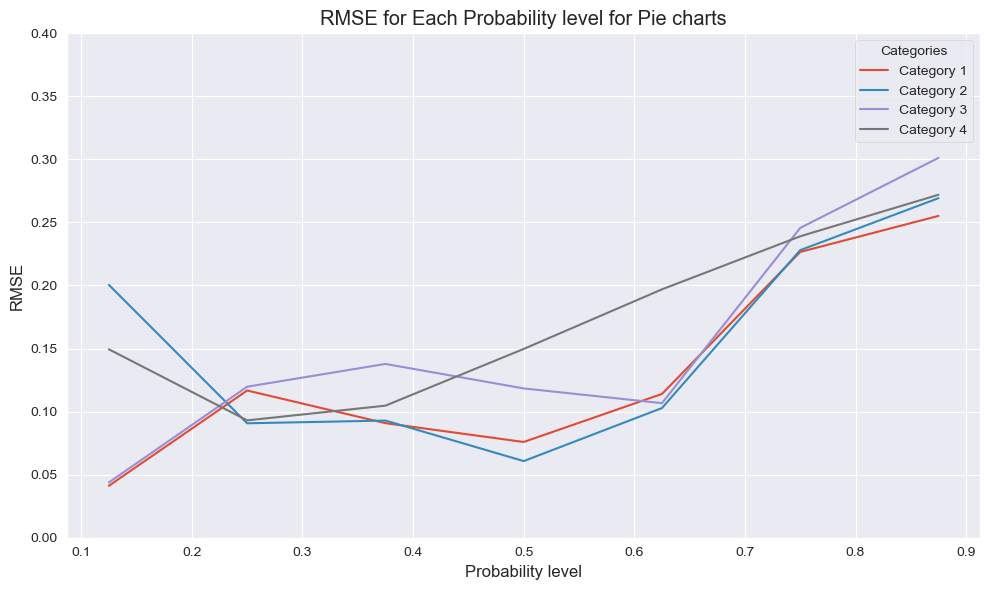

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

category1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
category2 = ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
category3 = ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
category4 = ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results_category1 = []
results_category2 = []
results_category3 = []
results_category4 = []

for prob_level in prob_levels:
    prob_results_category1 = []
    prob_results_category2 = []
    prob_results_category3 = []
    prob_results_category4 = []

    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category1)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category1.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category2)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category2.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category3)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category3.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })


    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category4)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category4.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    
    results_category1.extend(prob_results_category1)
    results_category2.extend(prob_results_category2)
    results_category3.extend(prob_results_category3)
    results_category4.extend(prob_results_category4)

results_df_category1 = pd.DataFrame(results_category1)
results_df_category2 = pd.DataFrame(results_category2)
results_df_category3 = pd.DataFrame(results_category3)
results_df_category4 = pd.DataFrame(results_category4)

plt.style.use('ggplot')
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df_category1, x='Probability_Level', y='RMSE', label='Category 1', palette='bright')
sns.lineplot(data=results_df_category2, x='Probability_Level', y='RMSE', label='Category 2', palette='bright')
sns.lineplot(data=results_df_category3, x='Probability_Level', y='RMSE', label='Category 3', palette='bright')
sns.lineplot(data=results_df_category4, x='Probability_Level', y='RMSE', label='Category 4', palette='bright')

plt.xlabel('Probability level')
plt.ylabel('RMSE')
plt.title('RMSE for Each Probability level for Pie charts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 0.4)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


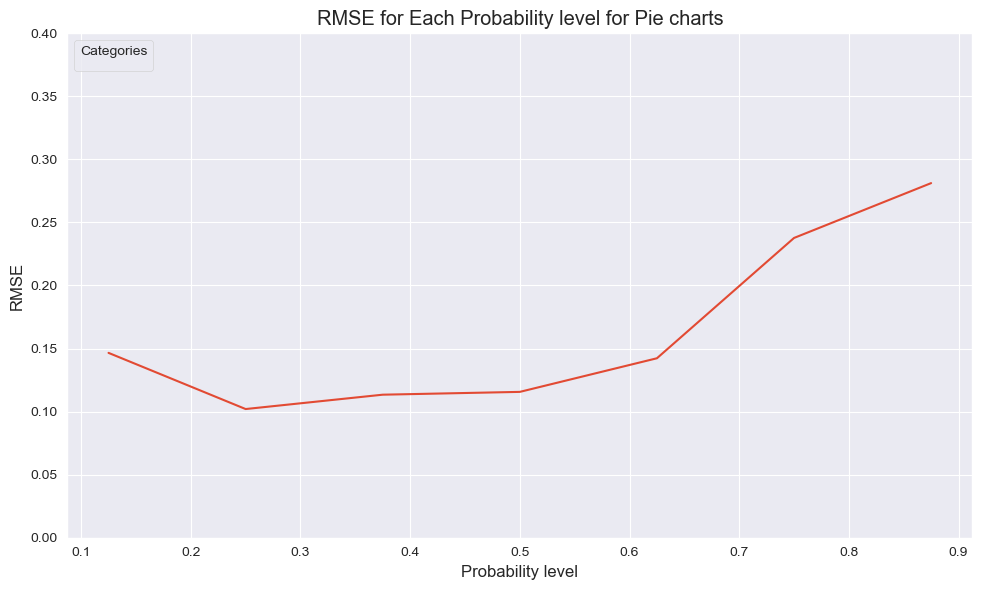

Probability Level: 0.125, RMSE: 0.14655488164279393
Probability Level: 0.25, RMSE: 0.10200217862597072
Probability Level: 0.375, RMSE: 0.11338479223913189
Probability Level: 0.5, RMSE: 0.11561430130683081
Probability Level: 0.625, RMSE: 0.142277116142329
Probability Level: 0.75, RMSE: 0.2376972864800941
Probability Level: 0.875, RMSE: 0.2812007981654549
Kruskal-Wallis Test:
KruskalResult(statistic=6.0, pvalue=0.42319008112684364)
Dunn's Post-Hoc Test:
          0.125     0.250     0.375     0.500     0.625     0.750     0.875
0.125  1.000000  0.190430  0.326109  0.512691  0.743421  0.743421  0.512691
0.250  0.190430  1.000000  0.743421  0.512691  0.326109  0.101707  0.049535
0.375  0.326109  0.743421  1.000000  0.743421  0.512691  0.190430  0.101707
0.500  0.512691  0.512691  0.743421  1.000000  0.743421  0.326109  0.190430
0.625  0.743421  0.326109  0.512691  0.743421  1.000000  0.512691  0.326109
0.750  0.743421  0.101707  0.190430  0.326109  0.512691  1.000000  0.743421
0.875  0.512

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
all_pie_categories = [
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'" ]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
results = []

# 1. Filter the data for the current probability level
# 2. Manual RMSE for pies


for prob_level in prob_levels:
    prob_results = []
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)

        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)

        prob_results.append({
            "Probability_Level": prob_level,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

    results.extend(prob_results)


results_df = pd.DataFrame(results)

plt.style.use('ggplot')
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Probability_Level', y='RMSE', palette='bright')
plt.xlabel('Probability level')
plt.ylabel('RMSE')
plt.title('RMSE for Each Probability level for Pie charts')
plt.xticks(rotation=0)
plt.legend(title='Categories', loc='upper left')
plt.tight_layout()
plt.ylim(0, 0.4)
plt.show()

# RMSE values for each probability level
for result in results:
    print(f"Probability Level: {result['Probability_Level']}, RMSE: {result['RMSE']}")

# Kruskal-Wallis test
kruskal_result = kruskal(*[group['RMSE'] for name, group in results_df.groupby('Probability_Level')])
print("Kruskal-Wallis Test:")
print(kruskal_result)

# Dunn's post-hoc
posthoc_dunn_result = posthoc_dunn(results_df, val_col='RMSE', group_col='Probability_Level')
print("Dunn's Post-Hoc Test:")
print(posthoc_dunn_result)



## Mean Confidence ratings (Likert Scale, 1== Lowest, 5==Highest Conf.) for probability levels of pie charts ##

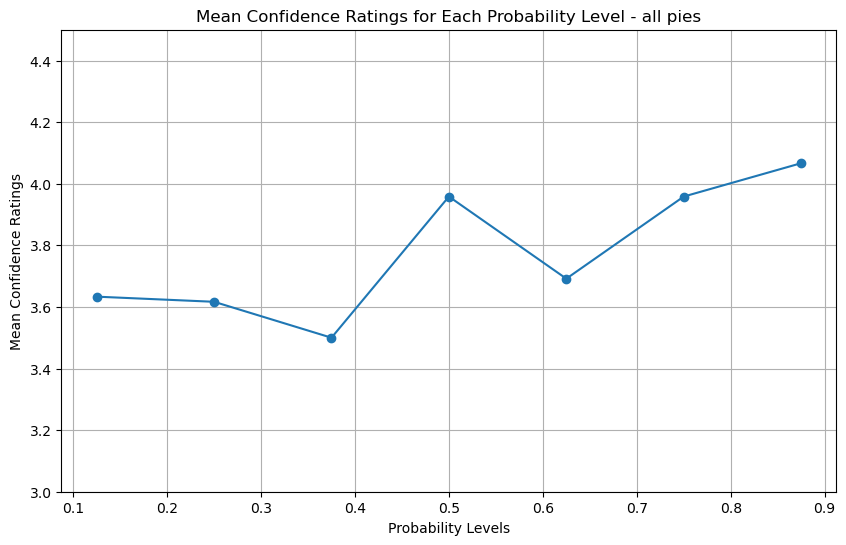

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

pie_categories_1 = [ "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
pie_categories_2 = [  "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
pie_categories_3 = [ "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
pie_categories_5 = [ "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_confidence_ratings = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    mean_confidence = pie_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings.append(mean_confidence)

plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings, marker='o', linestyle='-')
plt.xlabel('Probability Levels')
plt.ylabel('Mean Confidence Ratings')
plt.title('Mean Confidence Ratings for Each Probability Level - all pies')
plt.grid(True)
plt.ylim(3.0, 4.5)
plt.show()


### Mean Confidence ratings (Likert Scale) for probability levels of different pie chart types (1-4) ###

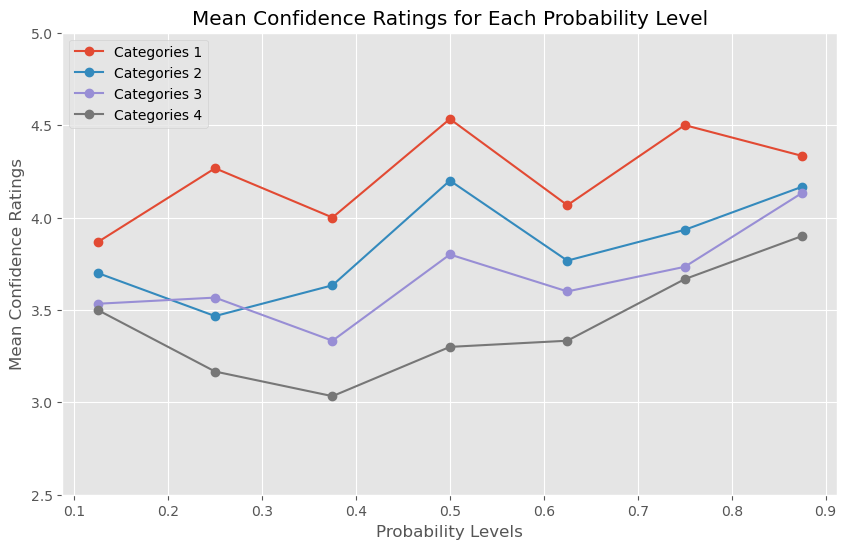

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

pie_categories_1 = [ "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
pie_categories_2 = [  "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
pie_categories_3 = [ "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
pie_categories_4 = [ "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_confidence_ratings_1 = []
mean_confidence_ratings_2 = []
mean_confidence_ratings_3 = []
mean_confidence_ratings_4 = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])

    #mean confidence rating for each category
    mean_confidence_1 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_1)]['confidenceLevelsArrayEXP'].mean()
    mean_confidence_2 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_2)]['confidenceLevelsArrayEXP'].mean()
    mean_confidence_3 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_3)]['confidenceLevelsArrayEXP'].mean()
    mean_confidence_4 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_4)]['confidenceLevelsArrayEXP'].mean()

    mean_confidence_ratings_1.append(mean_confidence_1)
    mean_confidence_ratings_2.append(mean_confidence_2)
    mean_confidence_ratings_3.append(mean_confidence_3)
    mean_confidence_ratings_4.append(mean_confidence_4)

# plot
plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings_1, marker='o', linestyle='-', label='Categories 1')
plt.plot(prob_levels, mean_confidence_ratings_2, marker='o', linestyle='-', label='Categories 2')
plt.plot(prob_levels, mean_confidence_ratings_3, marker='o', linestyle='-', label='Categories 3')
plt.plot(prob_levels, mean_confidence_ratings_4, marker='o', linestyle='-', label='Categories 4')
plt.xlabel('Probability Levels')
plt.ylabel('Mean Confidence Ratings')
plt.title('Mean Confidence Ratings for Each Probability Level')
plt.legend()
plt.grid(True)
plt.ylim(2.5, 5.0)
plt.show()


## Mean Confidence ratings (Likert Scale) between pie charts and experiential images ##

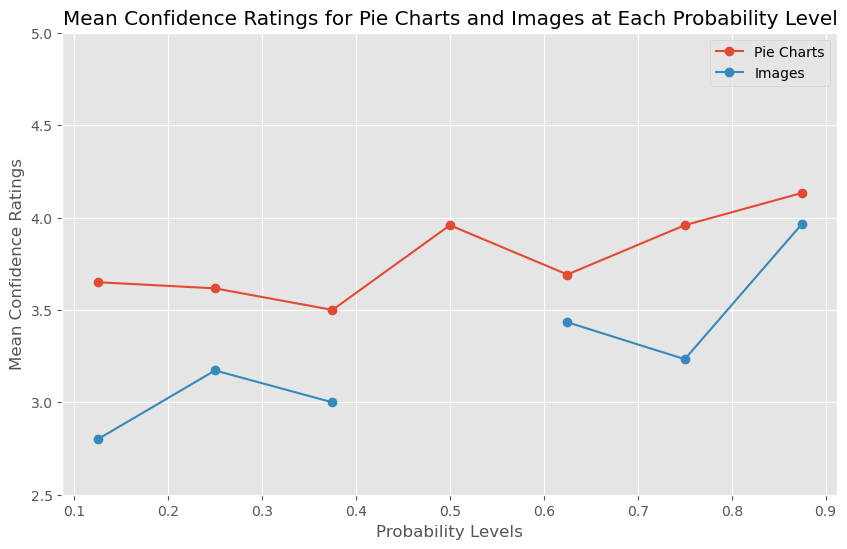

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
all_pie_categories = [
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'",
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_confidence_ratings_pie = []
mean_confidence_ratings_images = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    mean_confidence_pie = pie_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_pie.append(mean_confidence_pie)
    mean_confidence_image = image_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_images.append(mean_confidence_image)

#plot
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings_pie, marker='o', linestyle='-', label='Pie Charts')
plt.plot(prob_levels, mean_confidence_ratings_images, marker='o', linestyle='-', label='Images')
plt.xlabel('Probability Levels')
plt.ylabel('Mean Confidence Ratings')
plt.title('Mean Confidence Ratings for Pie Charts and Images at Each Probability Level')
plt.grid(True)
plt.ylim(2.5, 5.0)
plt.legend()
plt.show()


### Kruskall Wallis, Dunn's post hoc test, bonferroni correction ###

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scikit_posthocs as sp

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

all_pie_categories = [
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'",
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]
prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

confidence_ratings_pie = {prob_level: [] for prob_level in prob_levels}
confidence_ratings_images = {prob_level: [] for prob_level in prob_levels}

table_data = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    confidence_ratings_pie[prob_level].extend(pie_df['confidenceLevelsArrayEXP'])
    confidence_ratings_images[prob_level].extend(image_df['confidenceLevelsArrayEXP'])

    # Kruskal-Wallis test for probability level
    statistic, p_value = stats.kruskal(
        confidence_ratings_pie[prob_level],
        confidence_ratings_images[prob_level]
    )

    if len(confidence_ratings_pie[prob_level]) >= 3 and len(confidence_ratings_images[prob_level]) >= 3:
        data = {
            'Confidence Ratings': confidence_ratings_pie[prob_level] + confidence_ratings_images[prob_level],
            'Category': ['Pie'] * len(confidence_ratings_pie[prob_level]) + ['Image'] * len(confidence_ratings_images[prob_level])
        }
        
        df_posthoc = pd.DataFrame(data)
        
        posthoc_result = sp.posthoc_dunn(df_posthoc, val_col='Confidence Ratings', group_col='Category', p_adjust='bonferroni')
        
        if posthoc_result.iloc[0, 1] < 0.05:
            category_difference = "Image vs. Pie (Image)"
        elif posthoc_result.iloc[1, 0] < 0.05:
            category_difference = "Image vs. Pie (Image)"
        else:
            category_difference = "Image vs. Pie (Image)"
        
        table_data.append({
            'Category Difference': category_difference,
            'Probability Level': prob_level,
            'Kruskal-Wallis P-value': p_value,
        })
    else:
        table_data.append({
            'Category Difference': "No significant difference",
            'Probability Level': prob_level,
            'Kruskal-Wallis P-value': p_value,
        })

table_df = pd.DataFrame(table_data)
print(table_df)


         Category Difference  Probability Level  Kruskal-Wallis P-value
0      Image vs. Pie (Image)              0.125                0.000207
1      Image vs. Pie (Image)              0.250                0.045609
2      Image vs. Pie (Image)              0.375                0.021927
3  No significant difference              0.500                     NaN
4      Image vs. Pie (Image)              0.625                0.188071
5      Image vs. Pie (Image)              0.750                0.011759
6      Image vs. Pie (Image)              0.875                0.153207


### Confidence Ratings by Probability Level for pies, Kruskall Wallis, Dunn's posthoc, bonferroni correction ###

Kruskal-Wallis Test:
Chi-Square Statistic: 40.77
P-Value: 0.0000

Dunn's Post Hoc Test (Bonferroni adjusted p-values):
          1         2         3         4         5         6         7
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.039961
2  1.000000  1.000000  1.000000  0.148743  1.000000  0.158462  0.000735
3  1.000000  1.000000  1.000000  0.003336  1.000000  0.003632  0.000006
4  1.000000  0.148743  0.003336  1.000000  0.180621  1.000000  1.000000
5  1.000000  1.000000  1.000000  0.180621  1.000000  0.192179  0.000955
6  1.000000  0.158462  0.003632  1.000000  0.192179  1.000000  1.000000
7  0.039961  0.000735  0.000006  1.000000  0.000955  1.000000  1.000000


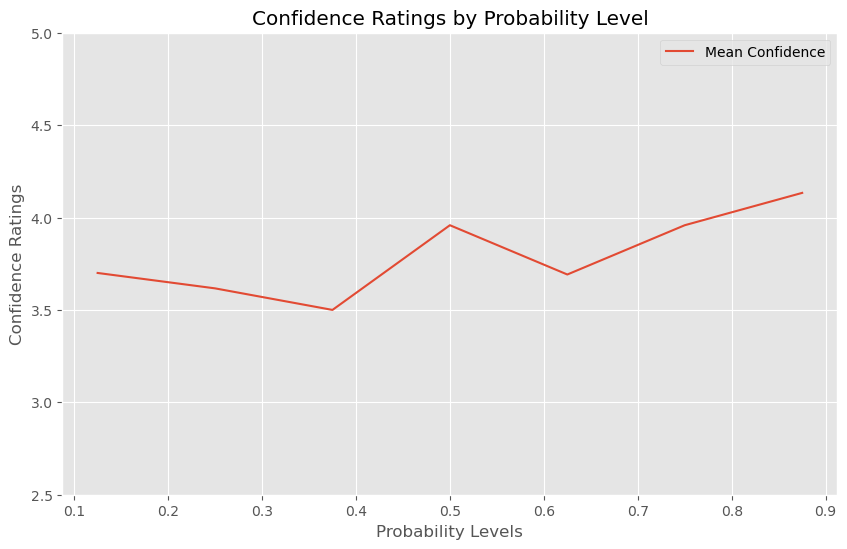

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
    ]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
confidence_ratings_by_level = []

mean_confidence_ratings_pie = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    confidence_ratings = pie_df['confidenceLevelsArrayEXP'].values
    confidence_ratings_by_level.append(confidence_ratings)
    
    mean_confidence_pie = pie_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_pie.append(mean_confidence_pie)


# Kruskal-Wallis
kw_statistic, kw_p_value = stats.kruskal(*confidence_ratings_by_level)
print(f"Kruskal-Wallis Test:")
print(f"Chi-Square Statistic: {kw_statistic:.2f}")
print(f"P-Value: {kw_p_value:.4f}")

posthoc_results = posthoc_dunn(confidence_ratings_by_level, p_adjust='bonferroni')
print("\nDunn's Post Hoc Test (Bonferroni adjusted p-values):")
print(posthoc_results)

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings_pie, linestyle='-', label='Mean Confidence')  #marker='o'
plt.xlabel('Probability Levels')
plt.ylabel('Confidence Ratings')
plt.title('Confidence Ratings by Probability Level')
plt.grid(True)
plt.legend()
plt.ylim(2.5, 5.0)
plt.show()


Kruskal-Wallis Test:
Chi-Square Statistic: nan
P-Value: nan

Dunn's Post Hoc Test (Bonferroni adjusted p-values):
          1         2         3         5         6         7
1  1.000000  1.000000  1.000000  0.586391  1.000000  0.000922
2  1.000000  1.000000  1.000000  1.000000  1.000000  0.094559
3  1.000000  1.000000  1.000000  1.000000  1.000000  0.011291
5  0.586391  1.000000  1.000000  1.000000  1.000000  0.778703
6  1.000000  1.000000  1.000000  1.000000  1.000000  0.372278
7  0.000922  0.094559  0.011291  0.778703  0.372278  1.000000


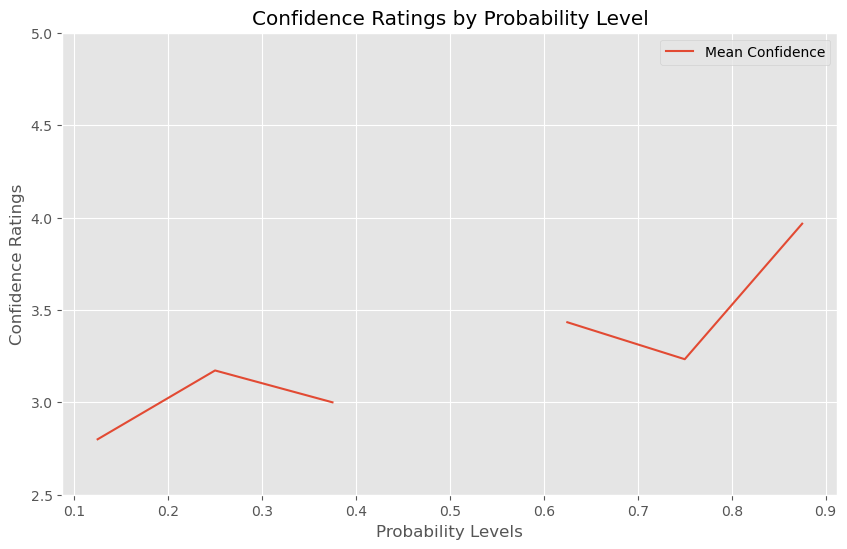

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
confidence_ratings_by_level = []

mean_confidence_ratings_images = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    im_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    confidence_ratings = im_df['confidenceLevelsArrayEXP'].values
    confidence_ratings_by_level.append(confidence_ratings)
    
    mean_confidence_image = im_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_images.append(mean_confidence_image)


# Kruskal-Wallis
kw_statistic, kw_p_value = stats.kruskal(*confidence_ratings_by_level)
print(f"Kruskal-Wallis Test:")
print(f"Chi-Square Statistic: {kw_statistic:.2f}")
print(f"P-Value: {kw_p_value:.4f}")

posthoc_results = posthoc_dunn(confidence_ratings_by_level, p_adjust='bonferroni')
print("\nDunn's Post Hoc Test (Bonferroni adjusted p-values):")
print(posthoc_results)

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings_images, linestyle='-', label='Mean Confidence')  #marker='o'
plt.xlabel('Probability Levels')
plt.ylabel('Confidence Ratings')
plt.title('Confidence Ratings by Probability Level')
plt.grid(True)
plt.legend()
plt.ylim(2.5, 5.0)
plt.show()


In [4]:
# Mean , SD, excluding participant 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
     "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]


prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

df = df[df['SubID'] != 3]

mean_confidence_ratings_pie = []
mean_confidence_ratings_image = []


std_confidence_ratings_pie = []
std_confidence_ratings_image = []


for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    im_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]

    mean_confidence_pie = pie_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_pie.append(mean_confidence_pie)

    mean_confidence_image = im_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_image.append(mean_confidence_image)


    std_confidence_pie = pie_df['confidenceLevelsArrayEXP'].std()
    std_confidence_ratings_pie.append(std_confidence_pie)

    std_confidence_image = im_df['confidenceLevelsArrayEXP'].std()
    std_confidence_ratings_image.append(std_confidence_image)

for i, prob_level in enumerate(prob_levels):
    print(f"Probability Level -Pie: {prob_level}:")
    print(f"Probability Level -Image: {prob_level}:")

    print(f"Mean Confidence Rating -Pie: {mean_confidence_ratings_pie[i]:.2f}")
    print(f"Mean Confidence Rating -Image: {mean_confidence_ratings_image[i]:.2f}")

    print(f"Standard Deviation -Pie: {std_confidence_ratings_pie[i]:.2f}")
    print(f"Standard Deviation -Image: {std_confidence_ratings_image[i]:.2f}")

    print()
    print()



Probability Level -Pie: 0.125:
Probability Level -Image: 0.125:
Mean Confidence Rating -Pie: 3.60
Mean Confidence Rating -Image: 2.67
Standard Deviation -Pie: 1.05
Standard Deviation -Image: 1.11


Probability Level -Pie: 0.25:
Probability Level -Image: 0.25:
Mean Confidence Rating -Pie: 3.56
Mean Confidence Rating -Image: 3.08
Standard Deviation -Pie: 1.03
Standard Deviation -Image: 1.16


Probability Level -Pie: 0.375:
Probability Level -Image: 0.375:
Mean Confidence Rating -Pie: 3.43
Mean Confidence Rating -Image: 2.85
Standard Deviation -Pie: 1.01
Standard Deviation -Image: 1.03


Probability Level -Pie: 0.5:
Probability Level -Image: 0.5:
Mean Confidence Rating -Pie: 3.95
Mean Confidence Rating -Image: nan
Standard Deviation -Pie: 0.90
Standard Deviation -Image: nan


Probability Level -Pie: 0.625:
Probability Level -Image: 0.625:
Mean Confidence Rating -Pie: 3.65
Mean Confidence Rating -Image: 3.41
Standard Deviation -Pie: 0.84
Standard Deviation -Image: 1.01


Probability Level 

## Correlation coefficients, linear vs polynomial model building ##

0.7825212951344972


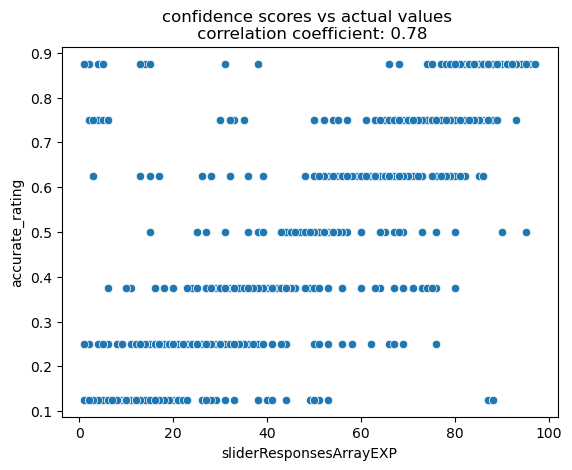

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

corr1 = df["sliderResponsesArrayEXP"].corr(df["accurate_rating"])
print(corr1)

sns.scatterplot(x="sliderResponsesArrayEXP", y="accurate_rating", data = df)
plt.title(f'confidence scores vs actual values \n correlation coefficient: {corr1:.2f}')
plt.show()

# there's a linear relationship, moderately strong, between sliderResponsesArrayEXP and accurate_rating


##### building a predictor using regression models (linear and polynomial ?) with different degrees to predict the accurate_rating based on the slider responses. We can evaluate each model splitting data into multiple folds folds. We can compare and select the best model that fits the data using e.g., MSE and R^2. We can then conclude whether the relation between the predictor and the target variables is lienar or polynomial #####


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100

df = df[['sliderResponsesArrayEXP', 'accurate_rating']]

df.dropna(inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['sliderResponsesArrayEXP']], df[['accurate_rating']],
                                                    test_size=0.25, random_state=42)

results = []

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# Degrees 1,2,3,4,5,6,7,8,9,10
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')


Linear Regression
MSE: 0.035823709773912304
R^2: 0.46802090108936

Polynomial Regression (degree = 1)
MSE: 0.0358237097739123
R^2: 0.4680209010893601

Polynomial Regression (degree = 2)
MSE: 0.03259672187424333
R^2: 0.5159414019502611

Polynomial Regression (degree = 3)
MSE: 0.03051079054076052
R^2: 0.5469173080799983

Polynomial Regression (degree = 4)
MSE: 0.02930843877593588
R^2: 0.5647721313928764

Polynomial Regression (degree = 5)
MSE: 0.028376693788088502
R^2: 0.578608466662947

Polynomial Regression (degree = 6)
MSE: 0.02788580848391247
R^2: 0.5858980724416932

Polynomial Regression (degree = 7)
MSE: 0.02810693625220078
R^2: 0.5826143435464854

Polynomial Regression (degree = 8)
MSE: 0.02831588917912462
R^2: 0.5795114100289569

Polynomial Regression (degree = 9)
MSE: 0.02806526002030349
R^2: 0.5832332321102505

Polynomial Regression (degree = 10)
MSE: 0.028054711934935334
R^2: 0.5833898702972165

Polynomial Regression (degree = 15)
MSE: 0.035558766108907694
R^2: 0.4719552923922

Degree: 1 MSE: 0.02502625802997595 R2: 0.6106442919582156
Degree: 2 MSE: 0.02336749148900042 R2: 0.636370653425222
Degree: 3 MSE: 0.02258897718268582 R2: 0.6479973638404208
Degree: 4 MSE: 0.021998940069029634 R2: 0.657134870124458
Degree: 5 MSE: 0.021259845317263038 R2: 0.6684363455435551
Degree: 6 MSE: 0.02105691313116448 R2: 0.6714458417690983
Degree: 7 MSE: 0.02097976905771575 R2: 0.6725798666514257
Degree: 8 MSE: 0.020980487677067672 R2: 0.6725962277700459
Degree: 9 MSE: 0.020933803449069567 R2: 0.6733180684310832
Degree: 10 MSE: 0.020984061739542106 R2: 0.6725222338864011
Degree: 15 MSE: 0.02106127422258314 R2: 0.671598015751639
Degree: 20 MSE: 0.02164564075746624 R2: 0.6626420957687836
Polynomial Regression Formula (Best Degree 9):
y = 0.00 - 6.16x^1 - 20.21x^2 + 692.05x^3 - 4335.29x^4 + 13310.74x^5 - 23060.84x^6 + 22958.16x^7 - 12263.96x^8 + 2725.81x^9


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


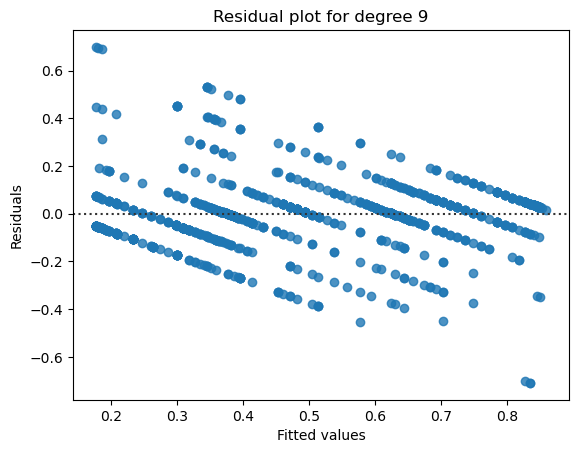

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


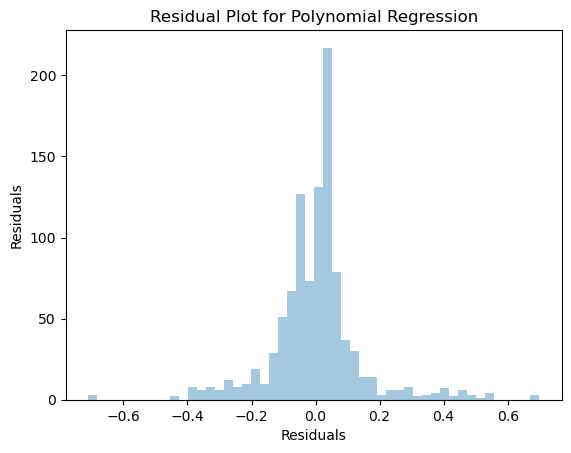

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = df[['sliderResponsesArrayEXP', 'accurate_rating']]
df.dropna(inplace=True)

X = df['sliderResponsesArrayEXP'].values.reshape(-1, 1)
y = df['accurate_rating'].values.reshape(-1, 1)

# degrees to be tested
degrees = [1,2,3,4,5,6,7,8,9,10,15,20]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Initialization
    model = LinearRegression()
    mse_scores = []
    r2_scores = []
    
    #K-Fold cross-validation on initialized
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    
    results.append((degree, mean_mse, mean_r2))

for degree, mse, r2 in results:
    print(f"Degree: {degree} MSE: {mse} R2: {r2}")

best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

coefficients = model.coef_[0]

formula = f"y = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    if coefficients[i] >= 0:
        formula += f" + {coefficients[i]:.2f}x^{i}"
    else:
        formula += f" - {abs(coefficients[i]):.2f}x^{i}"

print(f"Polynomial Regression Formula (Best Degree {best_degree}):")
print(formula)

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Polynomial Regression')
plt.show()

## can adding more features (confidence ratings) improve our models accuracy?? ##
- How well can participant predictions and confidence ratings explain the accurate ratings of images?
- Does increasing the polynomial degree improve the model's predictive performance?
- Which polynomial degree provides the best fit to the data based on MSE and R2?
- Are there any patterns or trends in the residuals, and do they meet the assumptions of linear regression?
- How well do participants' predicted ratings align with the actual ratings?
- Does the addition of polynomial features improve the model's performance in capturing the relationship between predictors and the target variable?


yes, adding confidence responses as a predictor does imporve our models accuracy but only by very little, it also selectes a polynomial with less degrees (=6)

Degree: 1 MSE: 0.024711569083135092 R2: 0.6173915976561497
Degree: 3 MSE: 0.02200033116245729 R2: 0.6592309486957131
Degree: 6 MSE: 0.020047453524938048 R2: 0.6892330162164386
Degree: 9 MSE: 0.022626268207928794 R2: 0.6482465353205775


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


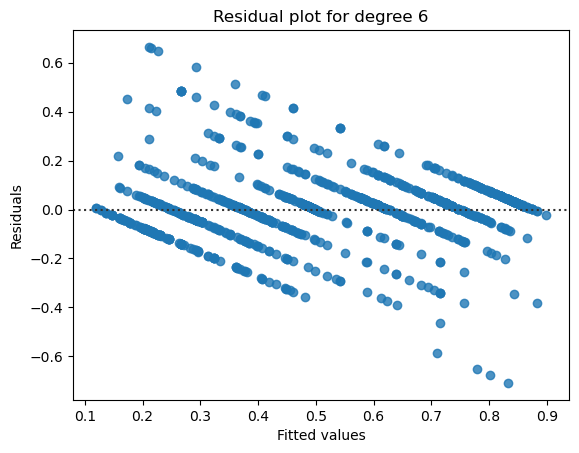

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


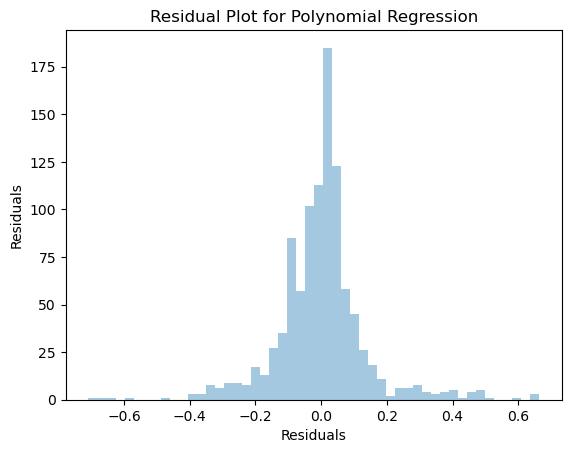

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert to NumPy arrays first (.values) to avoid indexing issues with training and testing index.

X = df[['sliderResponsesArrayEXP', 'confidenceLevelsArrayEXP']].values  
y = df['accurate_rating'].values  
degrees = [1, 3, 6, 9]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)
for degree in degrees:
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    mse_scores = []
    r2_scores = []
    
    #K-Fold cross-validation on initialized data
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]  
        
        model.fit(X_train, y_train)

        # Evaluation on testing data
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    
    results.append((degree, mean_mse, mean_r2))

for degree, mse, r2 in results:
    print(f"Degree: {degree} MSE: {mse} R2: {r2}")

# model
best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Polynomial Regression')
plt.show()


### Correlation between Slider response array and accurate rating for pies and images individually ###

0.8045381189722035


C:\Users\Asus\AppData\Local\Temp\ipykernel_24840\1488828949.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100
C:\Users\Asus\AppData\Local\Temp\ipykernel_24840\1488828949.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100


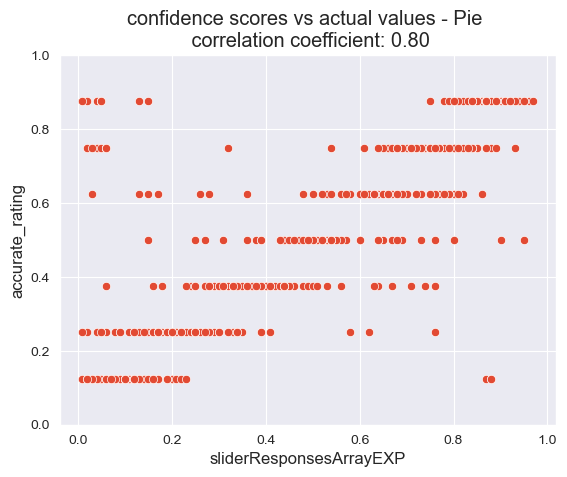

0.6930231022572004


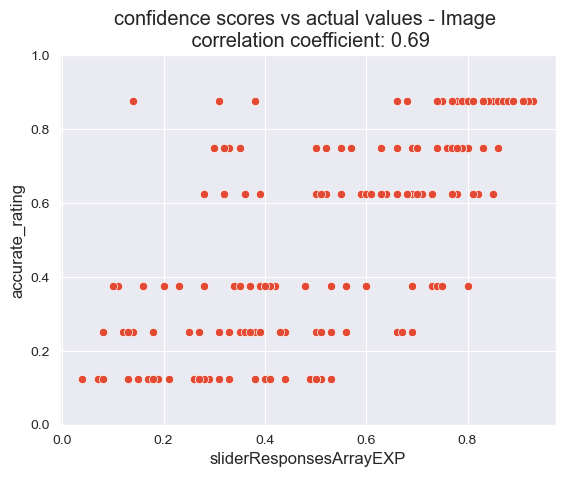

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')


all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
     "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]



pie_df = df[df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
im_df = df[df['selectedImageNamesArrayEXP'].isin(experiential_image)]

pie_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100
im_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100



corr_pie = pie_df["sliderResponsesArrayEXP"].corr(pie_df["accurate_rating"])
print(corr_pie)
sns.scatterplot(x="sliderResponsesArrayEXP", y="accurate_rating", data = pie_df)
plt.title(f'confidence scores vs actual values - Pie \n correlation coefficient: {corr_pie:.2f}')
plt.ylim(0, 1.0)
plt.show()


corr_im = im_df["sliderResponsesArrayEXP"].corr(im_df["accurate_rating"])
print(corr_im)
sns.scatterplot(x="sliderResponsesArrayEXP", y="accurate_rating", data = im_df)
plt.title(f'confidence scores vs actual values - Image \n correlation coefficient: {corr_im:.2f}')
plt.ylim(0, 1.0)
plt.show()



## Pies ##

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_df = df[df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]

pie_df['sliderResponsesArrayEXP'] = pie_df['sliderResponsesArrayEXP'] / 100
pie_df = pie_df[['sliderResponsesArrayEXP', 'accurate_rating']]
pie_df.dropna(inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pie_df[['sliderResponsesArrayEXP']], pie_df[['accurate_rating']],
                                                    test_size=0.25, random_state=42)

results = []

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# Degrees 1,2,3,4,5,6,7,8,9,10
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')

    #results
    #plt.figure(figsize=(8, 6))
    #plt.scatter(X_test, y_test, color='blue', label='actual')
    #plt.plot(X_test, y_pred, color='red', label='predicted')
    #plt.legend(loc='upper left')
    #plt.xlabel('Fuel Consumption Comb')
    #plt.ylabel('CO2 Emission')
    #plt.title(name)
    #plt.show()

    
    # residual
    #plt.figure(figsize=(8, 6))
    #sns.residplot(x=y_pred, y=y_test, color='blue')
    #plt.xlabel('Predicted Values')
    #plt.ylabel('Residuals')
    #plt.title(name)
    #plt.show()


    


Linear Regression
MSE: 0.015211341119389158
R^2: 0.7588929307700379

Polynomial Regression (degree = 1)
MSE: 0.015211341119389162
R^2: 0.7588929307700378

Polynomial Regression (degree = 2)
MSE: 0.014501801547443457
R^2: 0.7701394740795197

Polynomial Regression (degree = 3)
MSE: 0.014551860576867257
R^2: 0.7693460143984738

Polynomial Regression (degree = 4)
MSE: 0.01456538265581779
R^2: 0.7691316829466925

Polynomial Regression (degree = 5)
MSE: 0.01495279753457612
R^2: 0.762990970877956

Polynomial Regression (degree = 6)
MSE: 0.015139190752211193
R^2: 0.7600365487743683

Polynomial Regression (degree = 7)
MSE: 0.01503174773516445
R^2: 0.7617395722452144

Polynomial Regression (degree = 8)
MSE: 0.015053293786270109
R^2: 0.7613980569774421

Polynomial Regression (degree = 9)
MSE: 0.015234319748357802
R^2: 0.7585287084544599

Polynomial Regression (degree = 10)
MSE: 0.015583915508078902
R^2: 0.7529874476030983

Polynomial Regression (degree = 15)
MSE: 0.01674719202659883
R^2: 0.734548

C:\Users\Asus\AppData\Local\Temp\ipykernel_24840\2734242713.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_df['sliderResponsesArrayEXP'] = pie_df['sliderResponsesArrayEXP'] / 100


Degree: 1 MSE: 0.022217996338749595 R2: 0.640338103552858
Degree: 2 MSE: 0.020624804222622993 R2: 0.6660012325842681
Degree: 3 MSE: 0.019322485470138852 R2: 0.6864941907870838
Degree: 4 MSE: 0.018444746971863563 R2: 0.7013430730534184
Degree: 5 MSE: 0.0177184388923858 R2: 0.7130876380058139
Degree: 6 MSE: 0.017564839196693025 R2: 0.7158695224238503
Degree: 7 MSE: 0.017516621882397908 R2: 0.7169388118801432
Degree: 8 MSE: 0.01756295533918541 R2: 0.7160958847452091
Degree: 9 MSE: 0.017505903177953717 R2: 0.7168276007975588
Degree: 10 MSE: 0.017545658734647397 R2: 0.715932301788982
Degree: 15 MSE: 0.01791420098438835 R2: 0.7094681695052893
Degree: 20 MSE: 0.01789625101340852 R2: 0.7093471619781017
Polynomial Regression Formula (Best Degree 9):
y = 0.00 - 6.67x^1 - 16.67x^2 + 689.80x^3 - 4436.54x^4 + 13891.91x^5 - 24511.15x^6 + 24831.38x^7 - 13487.98x^8 + 3046.30x^9


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


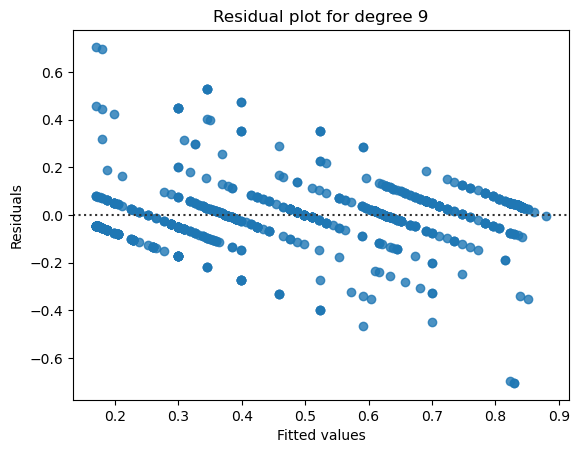

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


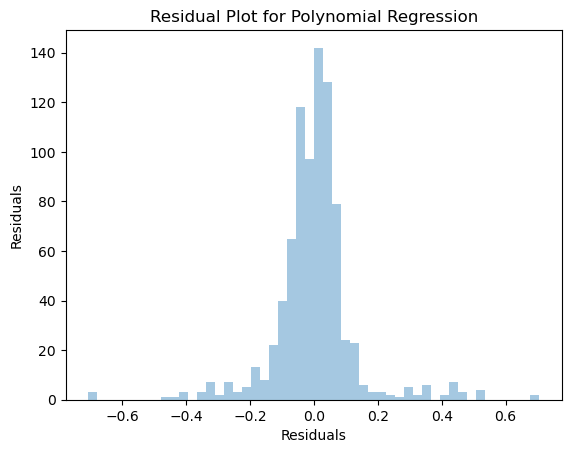

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pie_df = pie_df[['sliderResponsesArrayEXP', 'accurate_rating']]
pie_df.dropna(inplace=True)

X = pie_df['sliderResponsesArrayEXP'].values.reshape(-1, 1)
y = pie_df['accurate_rating'].values.reshape(-1, 1)

# degrees to be tested
degrees = [1,2,3,4,5,6,7,8,9,10,15,20]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Initialization
    model = LinearRegression()
    mse_scores = []
    r2_scores = []
    
    #K-Fold cross-validation on initialized
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    
    results.append((degree, mean_mse, mean_r2))

for degree, mse, r2 in results:
    print(f"Degree: {degree} MSE: {mse} R2: {r2}")

# Selection of the best model
best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])

# Fit the best-degree polynomial regression model
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Extract the coefficients of the polynomial features
coefficients = model.coef_[0]

# Create the formula string
formula = f"y = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    if coefficients[i] >= 0:
        formula += f" + {coefficients[i]:.2f}x^{i}"
    else:
        formula += f" - {abs(coefficients[i]):.2f}x^{i}"

print(f"Polynomial Regression Formula (Best Degree {best_degree}):")
print(formula)

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Polynomial Regression')
plt.show()

## Images ##

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

#filter for pie images only
im_df = df[df['selectedImageNamesArrayEXP'].isin(experiential_image)]

im_df['sliderResponsesArrayEXP'] = im_df['sliderResponsesArrayEXP'] / 100
im_df = im_df[['sliderResponsesArrayEXP', 'accurate_rating']]
im_df.dropna(inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(im_df[['sliderResponsesArrayEXP']], im_df[['accurate_rating']],
                                                    test_size=0.25, random_state=42)

results = []

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# Degrees 1,2,3,4,5,6,7,8,9,10
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')

    #results
    #plt.figure(figsize=(8, 6))
    #plt.scatter(X_test, y_test, color='blue', label='actual')
    #plt.plot(X_test, y_pred, color='red', label='predicted')
    #plt.legend(loc='upper left')
    #plt.xlabel('Fuel Consumption Comb')
    #plt.ylabel('CO2 Emission')
    #plt.title(name)
    #plt.show()

    
    # residual
    #plt.figure(figsize=(8, 6))
    #sns.residplot(x=y_pred, y=y_test, color='blue')
    #plt.xlabel('Predicted Values')
    #plt.ylabel('Residuals')
    #plt.title(name)
    #plt.show()


Linear Regression
MSE: 0.04754753130531009
R^2: 0.3630183939251408

Polynomial Regression (degree = 1)
MSE: 0.04754753130531009
R^2: 0.3630183939251408

Polynomial Regression (degree = 2)
MSE: 0.044988316395984385
R^2: 0.3973035140666139

Polynomial Regression (degree = 3)
MSE: 0.046478866091277056
R^2: 0.3773350170116284

Polynomial Regression (degree = 4)
MSE: 0.04597448165221749
R^2: 0.38409212092956513

Polynomial Regression (degree = 5)
MSE: 0.04715843837389019
R^2: 0.3682309682389736

Polynomial Regression (degree = 6)
MSE: 0.047095687702543645
R^2: 0.3690716222607343

Polynomial Regression (degree = 7)
MSE: 0.04730273603206152
R^2: 0.36629785096597334

Polynomial Regression (degree = 8)
MSE: 0.046009813331796885
R^2: 0.38361879183369063

Polynomial Regression (degree = 9)
MSE: 0.04540579789878559
R^2: 0.39171062562718495

Polynomial Regression (degree = 10)
MSE: 0.04320785554526119
R^2: 0.4211558736132054

Polynomial Regression (degree = 15)
MSE: 0.042351467898724626
R^2: 0.4326

C:\Users\Asus\AppData\Local\Temp\ipykernel_24840\2363768574.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_df['sliderResponsesArrayEXP'] = im_df['sliderResponsesArrayEXP'] / 100


##

Is there a relationship between the absolute error (between the actual ratings and the slider responses) and the confidence ratings??

1. AE as distance
2. AE with directionality 

## SVM !!!!!!! ##
### remove outliers from RT, z score, check if longer rts for images also lead to "advantageous" decisions, does 'waiting' longer improve accuracy?? ###

#### directionality in RMSE, MAE ####
#### are people underestimating or overestimating higher/lower probabilities ####